In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import scipy.stats as stats

In [2]:
year = 2021

In [3]:
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)
html = urlopen(url)
soup = BeautifulSoup(html)

In [4]:
soup.findAll('tr',limit=2)

[<tr>
 <th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
 <th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">Player</th>
 <th aria-label="Position" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>
 <th aria-label="Player's age on February 1 of the season" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season" scope="col">Age</th>
 <th aria-label="Team" class="poptip sort_default_asc center" data-stat="team_id" data-tip="Team" scope="col">Tm</th>
 <th aria-label="Games" class="poptip center" data-stat="g" data-tip="Games" scope="col">G</th>
 <th aria-label="Games Started" class="poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th>
 <th aria-label="Minutes Played Per Game" class="poptip hide_non_quals center" data-stat="mp_per_g"

In [5]:
headers = []
for head in soup.findAll('tr',limit=2)[0].findAll('th'):
    headers.append(head.getText())

In [6]:
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [7]:
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

In [8]:
stat = pd.DataFrame(player_stats, columns = headers)
stat.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,.544,...,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,...,,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,.570,...,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,.473,...,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


In [9]:
x = stat.drop(['Player','Pos','Tm','PTS'],axis=1)
y = stat.loc[:,['PTS']]

In [10]:
x = x.apply(pd.to_numeric).fillna(0)
y = y.apply(pd.to_numeric).fillna(0)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=random.randint(1,300))

In [12]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [13]:
y_prediction = regressor.predict(x_test)

In [14]:
y_test.describe()

,PTS
count,220.000000
mean,8.015000
std,6.502623
min,0.000000
25%,3.600000
50%,5.800000
75%,11.025000
max,28.500000


In [15]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

0.0747892474993991


In [16]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [17]:
y_prediction = regressor.predict(x_test)

In [18]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

0.8461409725657691


In [19]:
pts_prediction = pd.DataFrame(y_prediction)

In [20]:
pts_prediction.columns = ['PTS']

In [21]:
pts_prediction.describe()

,PTS
count,220.000000
mean,7.870909
std,6.281259
min,0.000000
25%,3.375000
50%,6.400000
75%,10.175000
max,28.800000


In [22]:
pts_prediction = pts_prediction.set_index(y_test.index)

In [23]:
def percent_error(predicted, actual):
    perc_error = ((predicted-actual)/actual)*100
    return perc_error

In [24]:
predicted_mean = pts_prediction.describe().iloc[1]
predicted_mean

PTS    7.870909
Name: mean, dtype: float64

In [25]:
population_mean = y.describe().iloc[1]
population_mean

PTS    8.310123
Name: mean, dtype: float64

In [26]:
y_test_mean = y_test.describe().iloc[1]
y_test_mean[0]

8.015000000000002

In [27]:
percent_error(predicted_mean,y_test_mean)

PTS   -1.797766
Name: mean, dtype: float64

In [28]:
percent_error(predicted_mean,population_mean)

PTS   -5.285289
Name: mean, dtype: float64

In [29]:
y_test_array = y_test.to_numpy()
y_test_array[:5]

array([[20.7],
       [ 8.3],
       [ 2.5],
       [ 8.7],
       [ 1.7]])

In [30]:
pts_prediction_array = pts_prediction.to_numpy()
pts_prediction_array[:5]

array([[21.2],
       [ 7.8],
       [ 1.4],
       [ 8. ],
       [ 1.7]])

0.9920508018452355

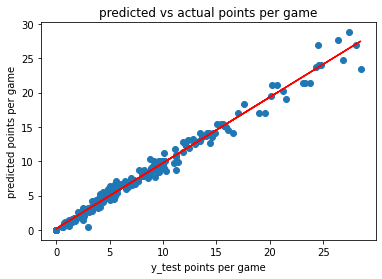

In [31]:
plt.scatter(y_test['PTS'],pts_prediction['PTS'])
plt.xlabel('y_test points per game')
plt.ylabel('predicted points per game')
plt.title('predicted vs actual points per game')

z = np.polyfit(y_test['PTS'], pts_prediction['PTS'], 1)
p = np.poly1d(z)
plt.plot(y_test['PTS'],p(y_test['PTS']),"r")

stats.pearsonr(y_test_array.flatten(),pts_prediction_array.flatten())[0]